In [31]:
#import fiona
import rasterio
#import rasterio.mask
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

fd = "D:/crs/proj/2015_Sandwich/analysis/"
# This file has DEM interpolation (default) in Photoscan
fn = "2017-09-18_U039_SandwichTNB_v3_DEM_10cm.tif"
fpath = fd+fn
print("Reading from ",fpath)
with rasterio.open(fpath) as src:
    z = src.read(1)
    zmsk = src.read_masks(1)
    
print(np.shape(z))

# No interpolation in this file
fn = "2017-09-18_U039_SandwichTNB_v3_DEM_10cm_no_interp.tif"
fpath = fd+fn
print("Reading from ",fpath)
with rasterio.open(fpath) as src:
    zn = src.read(1)
    znmsk = src.read_masks(1)
    
print(np.shape(zn))

Reading from  D:/crs/proj/2015_Sandwich/analysis/2017-09-18_U039_SandwichTNB_v3_DEM_10cm.tif
(13830, 17170)
Reading from  D:/crs/proj/2015_Sandwich/analysis/2017-09-18_U039_SandwichTNB_v3_DEM_10cm_no_interp.tif
(13830, 17170)


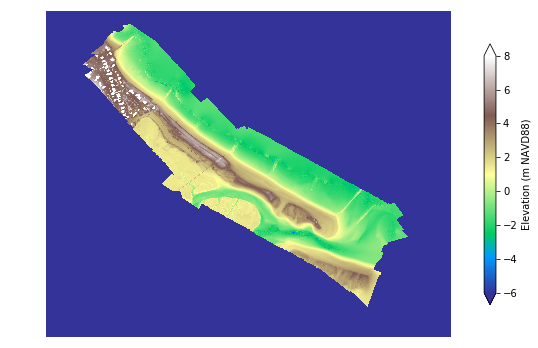

In [36]:
# Photoscan uses -32767 for missing data...replace with NaN

zma=np.ma.masked_where(z <= -32767, z)
# Change palette to highlight missing values
tcm = copy.copy(plt.cm.terrain)
tcm.norm_clip=False
tcm.set_bad(color='magenta',alpha=None)
#tcm.set_under(color='k',alpha=None)
#tcm.set_under('red',alpha=None)
fig, ax = plt.subplots(figsize=(12,6))
plt.axis('off');
im=plt.imshow(z,cmap=tcm,vmin=-6,vmax=8)

cbar = fig.colorbar(im, extend='both', shrink=0.8, ax=ax)
cbar.set_label('Elevation (m NAVD88)')
for ticklabel in ax.xaxis.get_ticklabels():
    ticklabel.set_visible(False)

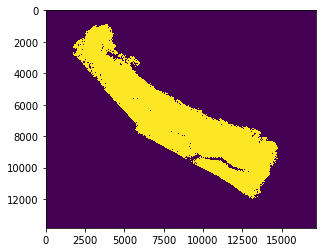

In [23]:
plt.imshow(msk)